# Data Manipulation Part 1: Groupby Operations

Data manipulation with Pandas is a way to describe the kind of analytics you have at your command with some very accessible pandas syntax, for doing the following kinds of tasks:

* Split a pandas object into pieces using one or more keys (in the form of functions, arrays, or DataFrame column names)
* Computing group summary statistics, like count, mean, or standard deviation, or a user-defined function
* Apply a varying set of functions to each column of a DataFrame
* Apply within-group transformations or other manipulations, like normalization, linear regression, rank, or subset selection
* Compute pivot tables and cross-tabulations
* Perform quantile analysis and other data-derived group analyses

Grouping keys can use any of these forms:

* A list or array of values that is the same length as the axis being grouped
* A value indicating a column name in a DataFrame
* A dict or Series giving a correspondence between the values on the axis being grouped and the group names
* A function to be invoked on the axis index or the individual labels in the index

Let's try some of the Groupby methods on the data we used last time.

In [1]:
%matplotlib inline
import pandas as pd
import pylab as P
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm
sns.set(style="darkgrid")

## Working with Census PUMS Microdata

(with acknowledgments to Aksel Olsen, from whom much of the material for today's session is adapted)

Data source: Census ACS 1-year PUMS data, 2012 release

The 2012 PUMS household and person tables for California were downloaded from:

Persons: [census ftp](http://www2.census.gov/acs2012_1yr/pums/csv_pca.zip)

Households: [census ftp](http://www2.census.gov/acs2012_1yr/pums/csv_hca.zip)

Note - these are large files and take time to download and to load into memory.

In [2]:
pums_h = pd.read_csv('data/ss12hca.csv')
#pums_h=pd.read_csv('data/pums_h_sf_2012.csv')
pums_h.index=pums_h.SERIALNO
pums_h.head()

,RT,SERIALNO,DIVISION,PUMA,REGION,ST,ADJHSG,ADJINC,WGTP,NP,...,wgtp71,wgtp72,wgtp73,wgtp74,wgtp75,wgtp76,wgtp77,wgtp78,wgtp79,wgtp80
SERIALNO,,,,,,,,,,,,,,,,,,,,,
11,H,11,9,8508,4,6,1000000,1010207,110,2,...,176,178,120,99,173,33,129,35,34,130
19,H,19,9,7502,4,6,1000000,1010207,180,0,...,308,184,288,52,185,337,288,188,190,197
22,H,22,9,8105,4,6,1000000,1010207,75,1,...,78,127,125,110,72,20,73,135,83,143
31,H,31,9,1305,4,6,1000000,1010207,76,2,...,88,24,75,76,131,140,20,29,130,141
40,H,40,9,2901,4,6,1000000,1010207,12,2,...,12,24,20,21,12,10,12,13,12,3


In [3]:
print(list(pums_h.columns))

['RT', 'SERIALNO', 'DIVISION', 'PUMA', 'REGION', 'ST', 'ADJHSG', 'ADJINC', 'WGTP', 'NP', 'TYPE', 'ACR', 'AGS', 'BATH', 'BDSP', 'BLD', 'BUS', 'CONP', 'ELEP', 'FS', 'FULP', 'GASP', 'HFL', 'INSP', 'MHP', 'MRGI', 'MRGP', 'MRGT', 'MRGX', 'REFR', 'RMSP', 'RNTM', 'RNTP', 'RWAT', 'SINK', 'SMP', 'STOV', 'TEL', 'TEN', 'TOIL', 'VACS', 'VALP', 'VEH', 'WATP', 'YBL', 'FES', 'FFINCP', 'FGRNTP', 'FHINCP', 'FINCP', 'FPARC', 'FSMOCP', 'GRNTP', 'GRPIP', 'HHL', 'HHT', 'HINCP', 'HUGCL', 'HUPAC', 'HUPAOC', 'HUPARC', 'KIT', 'LNGI', 'MULTG', 'MV', 'NOC', 'NPF', 'NPP', 'NR', 'NRC', 'OCPIP', 'PARTNER', 'PLM', 'PSF', 'R18', 'R60', 'R65', 'RESMODE', 'SMOCP', 'SMX', 'SRNT', 'SVAL', 'TAXP', 'WIF', 'WKEXREL', 'WORKSTAT', 'FACRP', 'FAGSP', 'FBATHP', 'FBDSP', 'FBLDP', 'FBUSP', 'FCONP', 'FELEP', 'FFSP', 'FFULP', 'FGASP', 'FHFLP', 'FINSP', 'FKITP', 'FMHP', 'FMRGIP', 'FMRGP', 'FMRGTP', 'FMRGXP', 'FMVP', 'FPLMP', 'FREFRP', 'FRMSP', 'FRNTMP', 'FRNTP', 'FRWATP', 'FSINKP', 'FSMP', 'FSMXHP', 'FSMXSP', 'FSTOVP', 'FTAXP', 'FTEL

In [4]:
#pums_p=pd.read_csv('data/pums_p_sf_2012.csv')
pums_p = pd.read_csv('data/ss12pca.csv')
pums_p.head()

,RT,SERIALNO,SPORDER,PUMA,ST,ADJINC,PWGTP,AGEP,CIT,CITWP,...,pwgtp71,pwgtp72,pwgtp73,pwgtp74,pwgtp75,pwgtp76,pwgtp77,pwgtp78,pwgtp79,pwgtp80
0,P,11,1,8508,6,1010207,109,63,1,NaN,...,176,178,120,100,173,32,129,35,34,129
1,P,11,2,8508,6,1010207,117,60,1,NaN,...,224,192,124,106,161,36,132,30,35,137
2,P,22,1,8105,6,1010207,75,79,1,NaN,...,79,127,125,110,72,20,72,134,83,143
3,P,31,1,1305,6,1010207,76,49,1,NaN,...,88,24,75,75,131,139,19,28,131,141
4,P,31,2,1305,6,1010207,98,48,1,NaN,...,129,26,81,93,179,173,25,41,164,198


In [5]:
print("there are {} observations of {} variables in the housing table ".format(pums_h.shape[0],pums_h.shape[1]))
print("there are {} observations of {} variables in the population table ".format(pums_p.shape[0],pums_p.shape[1]))

there are 153115 observations of 206 variables in the housing table 
there are 368047 observations of 286 variables in the population table 


Per the [Census Bureau's quick facts sheet](http://quickfacts.census.gov/qfd/states/06000.html), there are about 38 million people and  13.8 million housing units in California.

Thus, we have:
* Sample size for housing: $\frac{153,000}{13,800,000}=1.1\%$
* Sample size for population: $\frac{368,000}{38,300,000}=.94\%$

Let's do a few statistics--how many men and women in the Golden State? To answer this, we first need the [code book](http://www.census.gov/acs/www/Downloads/data_documentation/pums/DataDict/PUMSDataDict12.pdf), which we will need regularly for these types of exercises. Which table do we need?

We need the population table. As ever, refer to the data dictionary. Search for gender, male, female, or sex and see what appears.

In [6]:
pums_p.SEX

0         1
1         2
2         2
3         1
4         2
5         2
6         2
7         2
8         1
9         1
10        1
11        1
12        2
13        1
14        1
15        1
16        2
17        2
18        2
19        1
20        1
21        2
22        2
23        2
24        1
25        1
26        2
27        2
28        1
29        1
         ..
368017    1
368018    2
368019    2
368020    1
368021    1
368022    1
368023    2
368024    2
368025    1
368026    2
368027    2
368028    2
368029    2
368030    1
368031    1
368032    2
368033    1
368034    1
368035    2
368036    1
368037    2
368038    1
368039    2
368040    1
368041    1
368042    2
368043    1
368044    2
368045    1
368046    2
Name: SEX, dtype: int64

In [7]:
pums_p.SEX.value_counts() #.map({'1':"Male",'2':"Female"})

2    186615
1    181432
Name: SEX, dtype: int64

So, there are 181,000 1's and 186,000 2's. Done? 

No, we need to remember that these records have sample weights associated with them, allowing us to make *population estimates*. Think of the weights as roughly inversely proportional to the sampling probability. They should hover around 100, given the sample rate is around 1%. But some groups are much more likely to respond to surveys than others. The Census Bureau employs such information when designing the survey and sample rates for specific sub-groups. 

To get population estimates, we typically need to sum the weights.

In [8]:
pop_by_gender =  pums_p.groupby(['SEX'])['PWGTP'].agg(['sum'])
pop_by_gender

,sum
SEX,
1,18910864
2,19130566


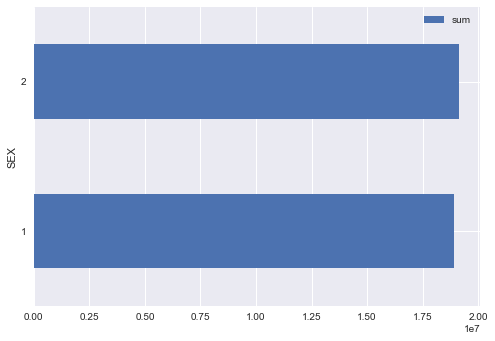

In [9]:
pop_by_gender.plot(kind='barh')

## Let's do a little filtering
We want to keep just the Bay Area records for now. So what geographic identifiers do we have in the PUMS files?

In [10]:
bayareafips ={'001':'Alameda', '013':'Contra Costa', '041':'Marin', '055':'Napa', '075':'San Francisco', '081':'San Mateo', '085':'Santa Clara', '095':'Sonoma', '097':'Solano'}
bayareafips.keys()

dict_keys(['001', '013', '041', '055', '075', '081', '085', '095', '097'])

In [11]:
print(list(pums_p.columns))

['RT', 'SERIALNO', 'SPORDER', 'PUMA', 'ST', 'ADJINC', 'PWGTP', 'AGEP', 'CIT', 'CITWP', 'COW', 'DDRS', 'DEAR', 'DEYE', 'DOUT', 'DPHY', 'DRAT', 'DRATX', 'DREM', 'ENG', 'FER', 'GCL', 'GCM', 'GCR', 'HINS1', 'HINS2', 'HINS3', 'HINS4', 'HINS5', 'HINS6', 'HINS7', 'INTP', 'JWMNP', 'JWRIP', 'JWTR', 'LANX', 'MAR', 'MARHD', 'MARHM', 'MARHT', 'MARHW', 'MARHYP', 'MIG', 'MIL', 'MLPA', 'MLPB', 'MLPC', 'MLPD', 'MLPE', 'MLPF', 'MLPG', 'MLPH', 'MLPI', 'MLPJ', 'MLPK', 'NWAB', 'NWAV', 'NWLA', 'NWLK', 'NWRE', 'OIP', 'PAP', 'RELP', 'RETP', 'SCH', 'SCHG', 'SCHL', 'SEMP', 'SEX', 'SSIP', 'SSP', 'WAGP', 'WKHP', 'WKL', 'WKW', 'WRK', 'YOEP', 'ANC', 'ANC1P', 'ANC2P', 'DECADE', 'DIS', 'DRIVESP', 'ESP', 'ESR', 'FOD1P', 'FOD2P', 'HICOV', 'HISP', 'INDP', 'JWAP', 'JWDP', 'LANP', 'MIGPUMA', 'MIGSP', 'MSP', 'NAICSP', 'NATIVITY', 'NOP', 'OC', 'OCCP', 'PAOC', 'PERNP', 'PINCP', 'POBP', 'POVPIP', 'POWPUMA', 'POWSP', 'PRIVCOV', 'PUBCOV', 'QTRBIR', 'RAC1P', 'RAC2P', 'RAC3P', 'RACAIAN', 'RACASN', 'RACBLK', 'RACNH', 'RACNUM', 'R

In [12]:
pums_p.PUMA.unique().shape

(265,)

(Incidentally, 265 means they easily satisfy the 100,000 population per PUMA area). 
To know which PUMAS are in which counties, we need to get a [correspondence](http://www2.census.gov/geo/tiger/GENZ2013/cb_2013_06_puma10_500k.zip). Or we can cheat--SF PUMAS provided below.

In [13]:
sfPUMAS = [k for k in range(7501,7508)]
sfPUMAS

[7501, 7502, 7503, 7504, 7505, 7506, 7507]

In [14]:
pums_p_sf=pums_p.ix[pums_p.PUMA.isin(sfPUMAS)]
pums_p_sf.shape

(7311, 286)

In [15]:
pums_h_sf=pums_h.ix[pums_h.PUMA.isin(sfPUMAS)]
pums_h_sf.shape

(3586, 206)

Down to several thousand records now. How many records in each?

In [16]:
## records per puma
pums_p_sf.groupby(['PUMA'])['PWGTP'].agg(['size'])

,size
PUMA,
7501,1231
7502,896
7503,971
7504,955
7505,969
7506,1063
7507,1226


What is the 2012 population of San Francisco based on these data?

In [17]:
sf_pop = pums_p_sf.PWGTP.sum()
sf_pop

824855

# Processing and recoding stuff
Data comes with numeric codes. Let's assign labels to a few as well as create some dummies.

### make convenience wrapper for assigning labels from dictionary to codes in data files
PUMS variables are not exposed in the census API (yet, at least). Instead, grab variable labels--pasted directly from PDF [data dictionary](http://www.census.gov/acs/www/Downloads/data_documentation/pums/DataDict/PUMSDataDict12.pdf).

Wrapper here reads the pasted strings, cleans them a bit and tries to stuff into a dictionary.

In [18]:
def map_value_labels(codes_pasted):
    code = []
    for item in codes_pasted.strip('\n').replace(' .',',').split('\n'):
        id = int(item.split(',')[0])
        val = item.split(',')[1]
        code.append([id,val])
    return dict(code)

def assign_value_labels(df,value_map,var):
    target = var+'L'
    if target in df.columns:
        df[target].replace(df[var].map(value_map))
    else:
        df[target] = df[var].map(value_map)
    print(df[target].value_counts())

### Applying the value label wrappers / mappers
1. paste the code, store in a variable as a string.

In [19]:
## we ship the blank category here--Ideally fix, but currently most vars are loaded as integers, so 'bb' won't work here
## RACE
## note that these are not actually verbatim categories from the code book. Instead, this collapses categories.
codesrace ="""
1 .White
2 .Black
3 .Other
4 .Other
5 .Other
6 .Asian
7 .Other
8 .Other
9 .Two + Races
"""

In [20]:
## TENURE
codesten="""
1 .Owned with mortgage or loan (include home equity loans)
2 .Owned free and clear
3 .Rented
4 .Occupied without payment of rent
"""

In [21]:
## YEAR BUILT
codeybl="""
01 .1939 or earlier
02 .1940 to 1959
03 .1940 to 1959
04 .1960 to 1979
05 .1960 to 1979
06 .1980 to 1999
07 .1980 to 1999
08 .2000 to 2011
09 .2000 to 2011
10 .2000 to 2011
11 .2000 to 2011
12 .2000 to 2011
13 .2000 to 2011
14 .2000 to 2011
15 .2000 to 2011
"""

In [22]:
## YEAR MOVED INTO UNIT
codemovein="""
1 .12 months or less
2 .13 to 23 months
3 .2 to 4 years
4 .5 to 9 years
5 .10 to 19 years
6 .20 to 29 years
7 .30 years or more
"""

Then, grab those strings, and call the two wrapper functions
 2. `race_value_map` in the example below stores the mapping dictionary
 3. `assign_value_labels` applies those value labels to the passed dataframe in the source variable name, with an `_l` (for label) appended.

In [37]:
var = 'RAC1P'
value_map = map_value_labels(codesrace)
assign_value_labels(pums_p,value_map,var) 

White          233425
Asian           51761
Other           46025
Black           20146
Two + Races     16690
Name: RAC1PL, dtype: int64


In [38]:
var = 'MV'
value_map = map_value_labels(codemovein)
assign_value_labels(pums_h,value_map,var) 

5 to 9 years         30248
10 to 19 years       28520
2 to 4 years         23960
12 months or less    16910
13 to 23 months      16562
30 years or more     15107
20 to 29 years       13988
Name: MVL, dtype: int64


In [26]:
var = 'TEN'
value_map = map_value_labels(codesten)
assign_value_labels(pums_h,value_map,var) 

Owned with mortgage or loan (include home equity loans)    55072
Rented                                                     49868
Owned free and clear                                       22270
Occupied without payment of rent                            2044
Name: TENL, dtype: int64


In [40]:
var = 'YBL'
value_map = map_value_labels(codeybl)
assign_value_labels(pums_h,value_map,var)  

1960 to 1979       43970
1980 to 1999       34802
1940 to 1959       29456
2000 to 2011       15354
1939 or earlier    13446
Name: YBLL, dtype: int64


In [27]:
## Bedrooms
def brclassifier(val):
    if val < 1: return "Studio"
    elif val <=1: return "1 bedroom"
    elif val <=2: return "2 bedrooms"
    #elif val <=3: return "3 bedrooms"
    #elif val <=4: return "4 bedrooms"
    elif val >=3: return "3 or more bedrooms"
pums_h['BDSP_l']=pums_h.BDSP.apply(lambda x: brclassifier(x))
pums_h.BDSP_l.head()

SERIALNO
11    3 or more bedrooms
19             1 bedroom
22            2 bedrooms
31    3 or more bedrooms
40            2 bedrooms
Name: BDSP_l, dtype: object

In [29]:
def age_mapping_dyn(x):
    ## ordinal var
    breaks = [0,18,34,59,79,99]

    ## given the breaks above, what is the interval between each?
    diff=[breaks[i+1]-breaks[i] for i in range(len(breaks)-1)]
    
    ## make tuples of breaks and distance--we need this to generate a list of age ranges
    joint = zip(breaks,diff)
    l=['%s-%s'%(yr[0],yr[0]+yr[1]-1) for yr in joint]
    
    # Which bin in breaks does the age fall in?
    cnt=0
    for k in breaks:
        #print k
        if x<k:
            break
        else:
            cnt+=1
    index = 0 if cnt==0 else cnt-1
    
    ## the bin id is then used to select the appropriate age range
    return l[index]

age_mapping_dyn(67)

'59-78'

In [59]:
pums_p['AGEPL']=pums_p.AGEP.map(age_mapping_dyn)
pums_p.AGEPL.head()

0    59-78
1    59-78
2    79-98
3    34-58
4    34-58
Name: AGEPL, dtype: object

## Let's create a new dummy for movers
First, we create a new variable, called newcomer, referring to folks who moved to SF during the past year. The relevant variable is `MIGPUMA`. How does it work? There are lots of missing values--most folks do not move during a given year.

(Codes differ from PUMA designations, as it happens. Refer to [code list](http://www.census.gov/acs/www/Downloads/data_documentation/pums/CodeLists/ACSPUMS2012CodeLists.pdf) here:)

In [45]:
pums_p['MIGPUMA'].dtypes

dtype('float64')

In [42]:
pums_p.MIGPUMA.value_counts().head(8)

3700.0    11612
7300.0     3520
5900.0     3235
6500.0     2696
1.0        2367
7100.0     2236
100.0      2235
6700.0     2141
Name: MIGPUMA, dtype: int64

In [46]:
pums_p['newcomer'], pums_h['newcomer']=0,0
pums_p.ix[(pums_p.MIGPUMA!=7500)&(pums_p.MIGPUMA>0),['newcomer']]=1
pums_p['newcomer']=pums_p['newcomer'].map({0:'existing resident',1:'new resident'})
pums_p['newcomer'].value_counts()

existing resident    317362
new resident          50685
Name: newcomer, dtype: int64

## Now we can study our population with respect to other characteristics


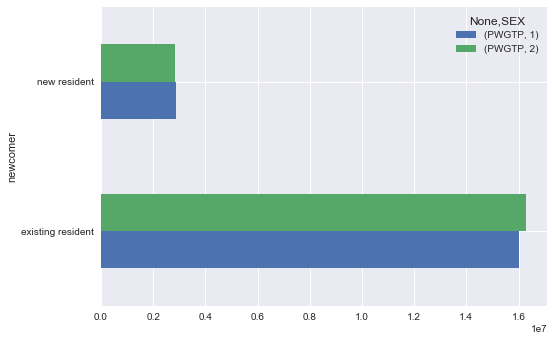

In [33]:
pums_p.ix[:,['newcomer','SEX','PWGTP']].groupby(['newcomer','SEX']).sum().unstack().plot(kind='barh')

Let's add some age information to movers, picking arbitrary age breaks for categorization.

In [61]:
pums_p.ix[:,['newcomer','AGEPL','PWGTP']].groupby(['newcomer','AGEPL']).sum()

PWGTP
newcomer          AGEPL          
existing resident 0-17    7882541
                  18-33   6709605
                  34-58  11216011
                  59-78   5187931
                  79-98   1319422
new resident      0-17    1347003
                  18-33   2263351
                  34-58   1622568
                  59-78    390474
                  79-98    102524

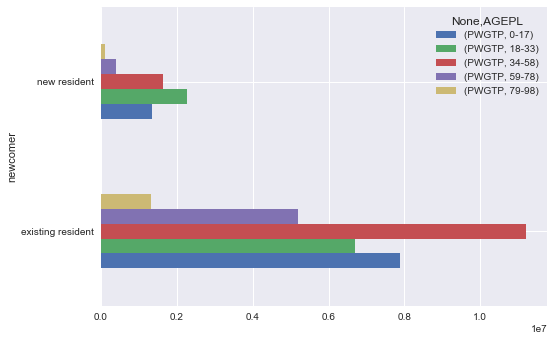

In [64]:
pums_p.ix[:,['newcomer','AGEPL','PWGTP']].groupby(['newcomer','AGEPL']).sum().unstack().plot(kind='barh')

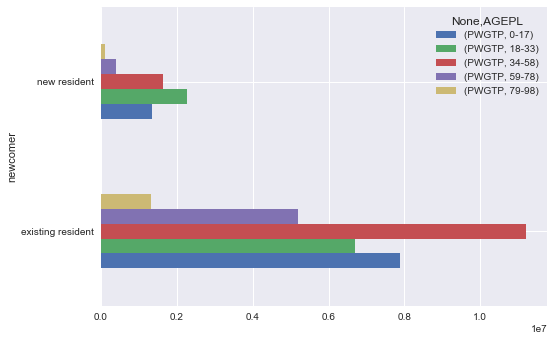

In [66]:
pums_p.ix[:,['newcomer','AGEPL','PWGTP']].groupby(['newcomer','AGEPL']).sum().unstack().plot(kind='barh')

In [56]:
new_by_race = pums_p.ix[:,['newcomer','RAC1PL','PWGTP']].groupby(['newcomer','RAC1PL']).sum()
new_by_race

PWGTP
newcomer          RAC1PL               
existing resident Asian         4388282
                  Black         1846543
                  Other         4475976
                  Two + Races   1388573
                  White        20216136
new resident      Asian          738948
                  Black          422679
                  Other          863996
                  Two + Races    303564
                  White         3396733

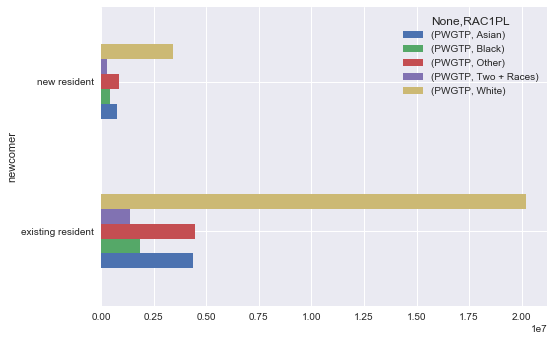

In [57]:
new_by_race.unstack().plot(kind='barh')

In [ ]:
grouped = calls.groupby('Z')
grouped

Computing means on the grouped data object gives us group level means for observations matching each key value.

In [ ]:
grouped.count()

Here is an example, using a new object we construct as a list of the same length as the axis being grouped:

In [ ]:
key3 = ['x','x','x','y','y']
grouped = df.groupby(key3)

In [ ]:
grouped.mean()

If we use two keys we get a heirarchical key grouping:

In [ ]:
grouped = df.groupby(['key1', 'key2'])
grouped.mean()

You can change the presentation of the results with the 'unstack' method, like so:

In [ ]:
grouped.mean().unstack()

Or just analyze one data column.

In [ ]:
grouped['data1'].mean().unstack()

Apparently the syntax is somewhat flexible about how to specify this:

In [ ]:
grouped.mean()['data1'].unstack()

In [ ]:
grouped.mean().unstack()['data1']

For those of you familiar with PivotTables in Excel, you might think the above results look like PivotTables.  No coincidence.  Pandas provides an alternative way to use the groupby operations that is called pivot_table:

In [ ]:
df.pivot_table(index='key1', columns='key2', values='data1')

Mean is the default agg operation, but you can use others:

And we can combine different types of groupby objects. In this example, DataFrame columns and a list:

In [ ]:
grouped = df.groupby(['key1', 'key2', key3])
grouped.mean()

Below are the optimized groupby methods, like mean, that you can use.  You can extend these with your own functions, but these are built-in and optimized for computational performance on larger datasets.

#### Table 9-1. Optimized groupby methods ####
| Function Name | Description |
|---|--------------------------|
| count | Number of non-NA values in the group
| sum | Sum of non-NA values
| mean | Mean of non-NA values
| median | Arithmetic median of non-NA values
| std, var | Unbiased (n - 1 denominator) standard deviation and variance 
| min, max | Minimum and maximum of non-NA values
| prod | Product of non-NA values
| first, last | First and last non-NA values

In [ ]:
df.pivot_table(index='key1', columns='key2', values='data1', aggfunc=max)

In [ ]:
grouped = df.groupby(['key1'])

In [ ]:
grouped.sum()

These functions (and your own) can be put into a list, and used with the 'agg' method to get specific results you want.

In [ ]:
function_list = ['count', 'mean', 'min', 'max']
grouped.agg(function_list)

You can define your own functions, and use them in these agg operations

In [ ]:
def max_min(x):
    return x.max() - x.min()

In [ ]:
function_list = ['count', 'mean', 'min', 'max', max_min]
grouped.agg(function_list)

You can of course also use pandas to plot results of groupby operations.

In [ ]:
grouped['data1'].std().plot(kind='bar')

In [ ]:
grouped.std().plot(kind='bar')

In [ ]:
grouped.std().plot(kind='bar', stacked=True)

How does this work when we use two keys to groupby?

In [ ]:
grouped = df.groupby(['key1', 'key2'])
grouped.sum().plot(kind='bar')

In [ ]:
grouped.sum().plot(kind='bar', stacked=True)

## Back to Rental Data

OK, so the best way to practice and get comfortable with these tooks is to use them on real data.  Let's get some practice with the rent_bay_filtered.csv dataset.

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
rents = pd.read_csv('data/rent_bay_filtered.csv').dropna()

In [ ]:
for name in rents.columns:
    print name+',',

OK, one advanced topic before turning you loose on the data.  In this case, we want to compute group-level variables that are a transformation of the data.  We'll compute a z-score for each group and add it to the table of results.  Z-scored normalize by the standard error, so the resulting standard errors are 1.

This example uses list comprehension.

In [ ]:
cols = ['price', 'sqft', 'bedrooms']
grouping_col = ['county_x']
rent = rents[grouping_col + cols]
grouped = rent.groupby(grouping_col)
zscore = lambda x: (x - x.mean()) / x.std()
rent[[ 'z_' + col for col in cols]] = grouped.transform(zscore)
rent.head()

In [ ]:
rent.groupby(grouping_col).mean()

In [ ]:
rent.groupby(grouping_col).std()

## OK, now back to basics.  Your turn to work with groupby.

Generate a groupby object called 'grouped' grouping on county_x

In [ ]:
gr = rents.groupby('county_x')

Now compute the mean price for each county_x

In [ ]:
mean_prices = gr['price'].mean()

Plot this as a bar chart

In [ ]:
mean_prices.plot(kind='bar')

Compute the maximum price per county_x

In [ ]:
max_prices = gr['price'].max()

Plot this as a horizontal bar chart

In [ ]:
max_prices.plot(kind='barh')

Compute a groupby object using county, and within county_x, by number of bedrooms.

In [ ]:
gr2 = rents.groupby(['county_x', 'bedrooms'])

Compute the mean price and sqft in each groupby value (county_x and bedroom)

In [ ]:
means = gr2[['price', 'sqft']].mean()

Use the 'unstack' method to present the results as a two-dimensional table

In [ ]:
means = means.unstack()

Plot this as a horizontal bar chart (increase figsize to 10,10 to make this legible)

In [ ]:
means.plot(kind='barh', edgecolor='None', figsize=(10,10))

Do the same tabulation (no plot), but presenting the 10th percentile values instead of means

In [ ]:
gr2[['price', 'sqft']].quantile(0.9)

Do the same, but use describe to get the full statistical profile 

In [ ]:
gr2[['price', 'sqft']].describe()

Do the same, presenting the count of how many nonmissing price values there are in each group

In [ ]:
gr2[['price', 'sqft']].count()

Define a function called 'q75_q25' that computes the difference between the 75th percentile and the 25th percentile, and analyze this value in the groupby

In [ ]:
def q75_q25(x):
    return x.quantile(0.75)-x.quantile(0.25)

In [ ]:
gr2.agg(q75_q25)

Create a list of functions to apply, using min, median, max, and q75_q25 for price and sqft by county_x, and bedrooms

In [ ]:
f = ['min', 'median', 'max', q75_q25]
gr2.agg(f)

Use the pivot_table syntax to create a table of max prices by county_x by bedrooms

In [ ]:
rents.pivot_table(index='county_x', columns='bedrooms', values='price')

OK -- now start experimenting with groupby and plotting on your own data